### **Regression Analysis**

##### **Check the Environment Setting**

In [1]:
# Check whether they are installed and version
import sys
print(f"Python      : {sys.version}")

import scipy
print(f"Scipy       : {scipy.__version__}")

import numpy
print(f"Numpy       : {numpy.__version__}")

import matplotlib
print(f"Matplotlib  : {matplotlib.__version__}")

import pandas
print(f"Pandas      : {pandas.__version__}")

import sklearn
print(f"Scikit-Learn: {sklearn.__version__}")

Python      : 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Scipy       : 1.14.0
Numpy       : 1.26.4
Matplotlib  : 3.9.0
Pandas      : 2.2.2
Scikit-Learn: 1.5.1


##### **Problem Definition**
For this analysis we will use `Boston House Price` dataset. There are 14 attributes on which the `MEDV` attribute will be used as output attribute. The dataset has 506 instances.

##### **Load the Dataset**

`Import Libraries`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

`Load Data`

In [3]:
datapath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(datapath, sep='\s+', names=column_names)

##### **Analyze Data**

`Descriptive Analysis`

In [12]:
# Shape of the Data
data.shape

(506, 14)

In [13]:
# Take a LOOK of Data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
# Attribute Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [21]:
# Data Description
#pd.set_option('precision', 2)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


`[NB]` *The min, max values as well as the means vary a lot. We have to rescale the data for a better result*

In [23]:
# Check Correlation
data.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


`[NB]` We can see that many of the attributes have a strong correlation (> 0.7 or < -0.7). For example -
* NOX and INDUS with 0.76
* DIS nad INDUS with -0.71
* TAX and INDUS with 0.72
* AGE and NOX with 0.73
* DIS and AGE with -0.75
* DIS and NOX with -0.77
* RAD and TAX with 0.91
* LSTAT and MEDV with -0.74
* MEDV and RM with 0.70

##### **Data Visualization**

`Univariate Plots`

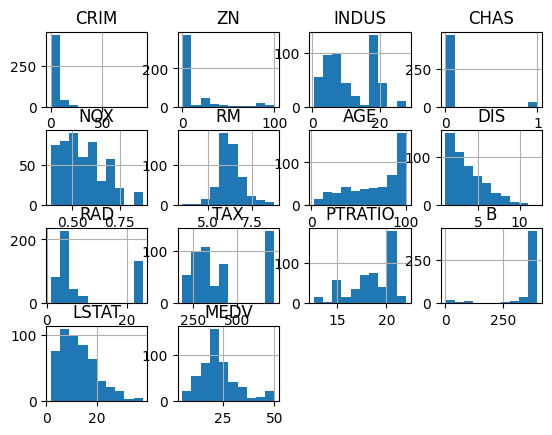

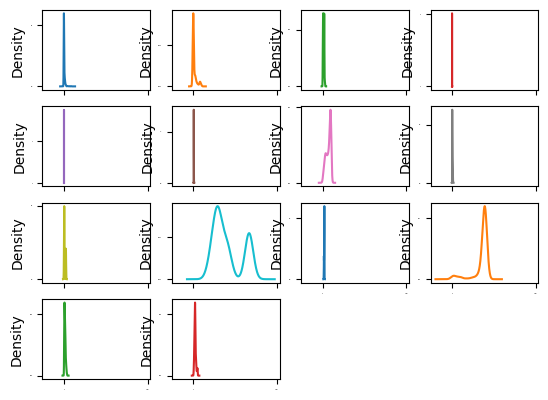

In [30]:
# Histogram and Density Plot
data.hist()
data.plot(kind='density', subplots=True, layout=(4,4), legend=False, fontsize=1)
plt.show()

`[NB]` *We can see that some attributes may have an exponential distribution, like- CIRM, ZN, AGE, and B. And others may have bimodal distribution, like - RAD and TAX.*
*The 'density' plot also suspect that NOX, RM and LSTAT may be skewed Gausian Distributions.*

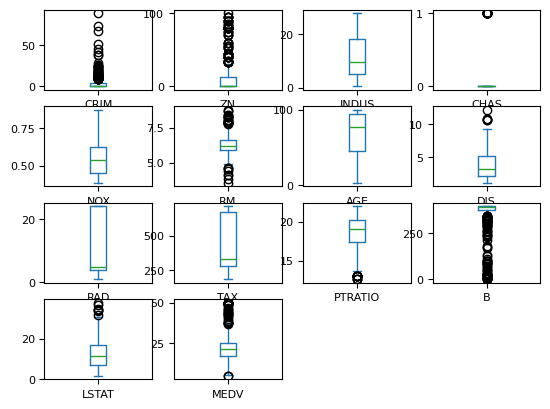

In [32]:
# Box and Whisker Plot
data.plot(kind='box', subplots=True, layout=(4,4), fontsize=8)
plt.show()

`[NB]` It is very helpful determinig the outliers of the data. (beyond the whisker of the plots)

`Multivariate Plots`

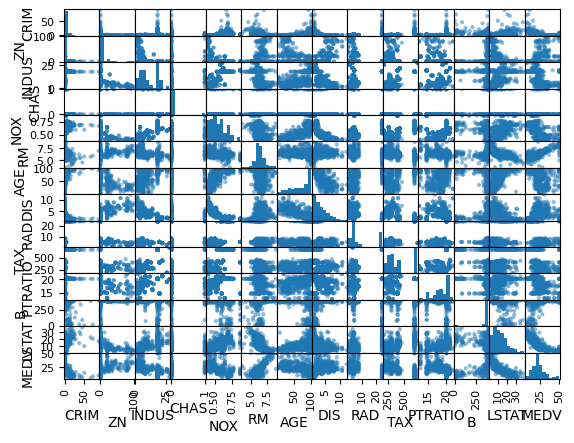

In [33]:
# Scatter Plot Matrix
scatter_matrix(data)
plt.show()

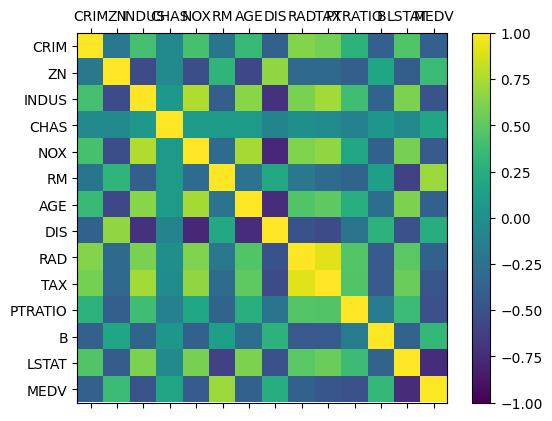

In [41]:
# Correlation Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation=None)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_names)
ax.set_yticklabels(column_names)
plt.show()

`[NB]` *The yellow color shows positive correlation and the dark maroon color shows negative correlation. The candidates with no correlation or very low correlation is suggested to exclude for better accuracy.*

##### **Validation Dataset**

In [42]:
# Split-out Validation Dataset
data = data.values
x = data[:,:-1]
y = data[:,-1]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=7)

# Check the splitted shapes
print(f"X_train: {x_train.shape}, Y_train: {y_train.shape}")
print(f"X_valid: {x_validation.shape},  Y_valid: {y_validation.shape}")

X_train: (404, 13), Y_train: (404,)
X_valid: (102, 13),  Y_valid: (102,)


##### **Evaluate Algorithms (Baseline)**

`Build and Evaluate Models`

LR    : -22.0060
LASSO : -27.1058
EN    : -27.9230
KNN   : -39.8089
CART  : -25.6928
SVR   : -67.8247


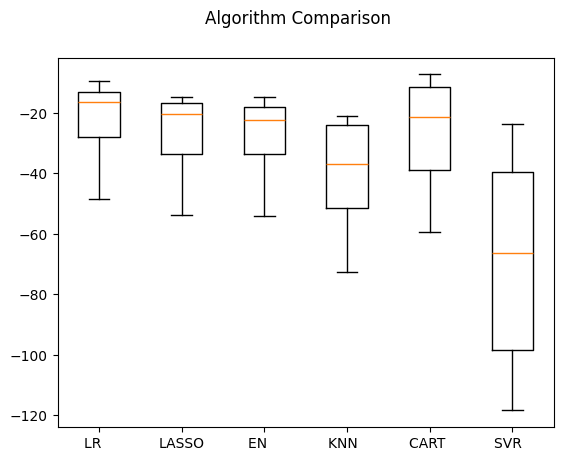

In [46]:
import warnings
warnings.filterwarnings('ignore')
# Spot-Check Algorithms
models = []
models.append(('LR   ', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN   ', ElasticNet()))
models.append(('KNN  ', KNeighborsRegressor()))
models.append(('CART ', DecisionTreeRegressor()))
models.append(('SVR  ', SVR()))

# Evaluate Each Model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean():.4f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`[NB]` *It seems that LR has the lowest error in raw data*

##### **Evaluate Algorithms (Standardization)**
It might affect negatively in accuracy of some algorithms due to the differing scales of the raw data. Le's evaluate the same algorithms with a standardized copy of the dataset.
To avoid data leakage during data standardization, it is good to use pipelines that build the model for each fold in the cross validation test harness.

`Build and Evaluate Models`

ScaledLR    : -22.0060
ScaledLASSO : -27.2059
ScaledEN    : -28.3012
ScaledKNN   : -21.4569
ScaledCART  : -26.0191
ScaledSVR   : -29.5704


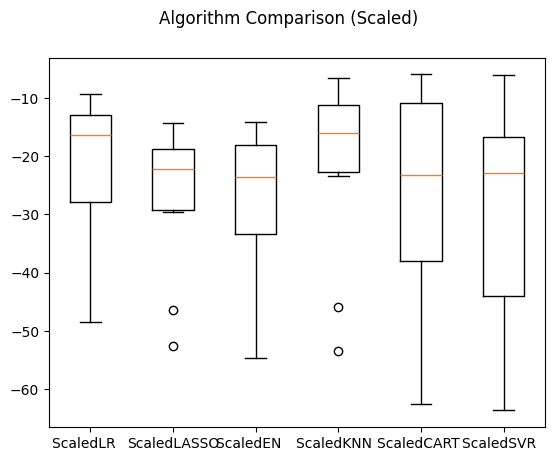

In [48]:
# Standardize the Dataset
pipelines = []
pipelines.append(('ScaledLR   ', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN   ', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN  ', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART ', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR  ', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

# Evaluate Each Model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean():.4f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison (Scaled)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`[NB]` *It seems that KNN has the lowest error in scaled data*

`Improve Results with Tuning`

We found that KNN achieves good results on the scaled dataset. But it can do better. The default value of the neighbours in KNN is 7. We can try agrid search to try a set of different numbers of neighbours and see if we can improve the score. Here, each k value (n_neighbours) is evaluated using 10-fold cross validation on a scaled training dataset.

In [50]:
# Tuning KNN
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
k_values = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_result = grid.fit(rescaled_x, y_train)
print(f"Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): print(f"{mean:.4f} ({stdev:.4f}) with {param}")

Best: -19.4978 using {'n_neighbors': 1}
-19.4978 (15.7698) with {'n_neighbors': 1}
-19.9780 (13.8040) with {'n_neighbors': 3}
-21.2710 (14.8335) with {'n_neighbors': 5}
-21.5773 (14.9526) with {'n_neighbors': 7}
-21.0011 (14.7013) with {'n_neighbors': 9}
-21.4903 (14.8670) with {'n_neighbors': 11}
-21.2685 (14.4550) with {'n_neighbors': 13}
-21.9681 (14.2099) with {'n_neighbors': 15}
-22.7399 (14.4928) with {'n_neighbors': 17}
-23.5069 (14.9032) with {'n_neighbors': 19}
-24.2403 (15.1566) with {'n_neighbors': 21}


##### **Ensemble Methods**
Ensemble method is another way of improving performance of algorithms. Here, we will evaluate four different ensemble ml algorithms, two boosting and two bagging methods:
* **Boosting Methods:** AdaBoost (AB) and Gradient Boosting (GBM)
* **Bagging Methods:** Random Forest (RF) and Extra Trees (ET)

The test harness will be the same as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

`Build and Evaluate Models`

ScaledAB  : -16.3232
ScaledGBM : -11.0046
ScaledRF  : -12.7876
ScaledET  : -9.5221


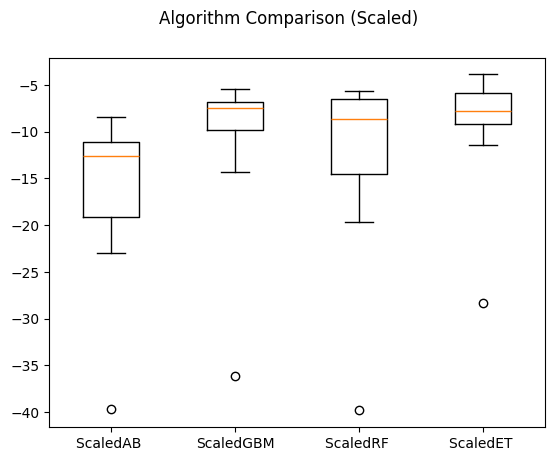

In [53]:
# Ensembles
ensembles = []
ensembles.append(('ScaledAB ', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF ', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET ', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

# Evaluate Each Model in turn
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean():.4f}")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison (Scaled)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Improve Results with Tuning`

The default numbers of boosting stages to perform (n_estimators) is 100. It is an ideal candidate parameter for any boosting and bagging algorithms to tune but sometimes it many vary. To ensure that, in this section we will look at tuning the number of stages for best performed `Extra Trees (ET)` bagging method on scaled data. We define a parameter grid n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [54]:
# Tuning ET
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 300, 350, 400]))
model = ExtraTreesRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_result = grid.fit(rescaled_x, y_train)
print(f"Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): print(f"{mean:.4f} ({stdev:.4f}) with {param}")

Best: -8.9500 using {'n_estimators': 100}
-9.2498 (7.4981) with {'n_estimators': 50}
-8.9500 (6.4148) with {'n_estimators': 100}
-9.1665 (6.5173) with {'n_estimators': 150}
-9.0181 (6.4507) with {'n_estimators': 200}
-9.1658 (6.7166) with {'n_estimators': 300}
-9.0385 (6.7081) with {'n_estimators': 350}
-9.1225 (6.8439) with {'n_estimators': 400}


##### **Finalize Model**
Here, we will finalize the `Extra Trees (ET)` bagging method and evaluate it on our validation dataset. First we need to prepare the model and train it on the entire standardized training dataset. We will then scale the validation dataset and generate predictions. For error estimation we will use `mean_squared_error` and `n_estimators=100`.

In [58]:
# Finalize the Model
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
model = ExtraTreesRegressor(random_state=7, n_estimators=100)
model.fit(rescaled_x, y_train)

# Transform the Validation Dataset
rescaled_validation_x = scaler.transform(x_validation)
predictions = model.predict(rescaled_validation_x)
error = mean_squared_error(y_validation, predictions)
print(f"Error: {error:.4f}")

Error: 12.4213


##### *We can see that the final mean squared error is **12.42** which is preety close to our estimate of **-8.95**.*